In [ ]:
import re
import cv2
import pytesseract
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from utils import hed_util

CWD_PATH = os.getcwd()
MODEL_NAME = 'model'
HED_NAME = 'HED'
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')
HED_PROTOTEXT_PATH = os.path.join(CWD_PATH,MODEL_NAME,HED_NAME,'deploy.prototxt')
HED_CAFFEE_MODEL_PATH = os.path.join(CWD_PATH,MODEL_NAME,HED_NAME,'hed_pretrained_bsds.caffemodel')
net = hed_util.load_dnn(HED_PROTOTEXT_PATH,HED_CAFFEE_MODEL_PATH)

In [ ]:
def preprocess(image, scale=1):
    #gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray,(image.shape[1]//scale,image.shape[0]//scale))
    #blur = cv2.blur(resized,(5,5))
    #thresh = cv2.threshold(resized, 100, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

    return resized

def dilate(image):
    kernel = np.ones((2,2),dtype=np.uint8)
    return cv2.dilate(image, kernel, iterations = 10)

    
#erosion
def erode(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

def reverse_color(img):
    return cv2.bitwise_not(img)

def opening(image):
    kernel = np.ones((1, 1), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


def getScale(image):
    height_scale = image.shape[0] // 540
    width_scale = image.shape[1] // 860
    return height_scale, width_scale

In [ ]:
def drawbox(img):
    d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    n_boxes = len(d['text'])
    boxes = img
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)   
            
    plt.imshow(boxes)
    plt.show()

In [ ]:
img_file = os.path.join(TEST_IMAGE_PATH,'ocr/myhi00123.jpg')
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
img = cv2.resize(gray,(860,540),cv2.INTER_AREA)
#cropped = img
cropped = img[300:,0:500]
#scale = 2
#cropped = cv2.resize(cropped,(image.shape[1]*scale,image.shape[0]*scale))
#cropped = cv2.medianBlur(cropped,3)
#cropped = opening(cropped)
cropped = cv2.bilateralFilter(cropped, 1, 55,55)
#cropped = cv2.GaussianBlur(cropped,(21,21),1)


#drawbox(cropped)
th1 = cv2.threshold(cropped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
th2 = cv2.adaptiveThreshold(cropped,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11, 6)
th3 = cv2.adaptiveThreshold(cropped,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11, 6)

plt.imshow(cropped)
plt.show()
plt.imshow(th1)
plt.show()
plt.imshow(th2)
plt.show()
plt.imshow(th3)

In [ ]:
img_file = os.path.join(TEST_IMAGE_PATH,'ocr/myhi00123.jpg')
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
height_scale, width_scale= getScale(image)
y = 300 * height_scale
width = 500 * width_scale
card1 = image[y:,0:width]
plt.title('CARD')
plt.imshow(card1)
plt.show()
print('height scale ',height_scale)
print('width scale ',width_scale)
img = cv2.resize(gray,(860,540))
card = img[300:,0:500]
plt.imshow(card)
plt.show()
cropped = cv2.GaussianBlur(card,(5,5),0)
plt.imshow(cropped)
plt.show()


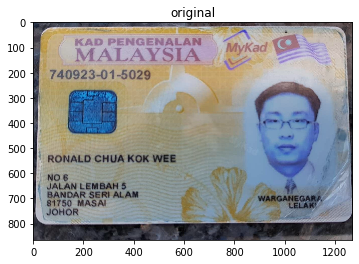

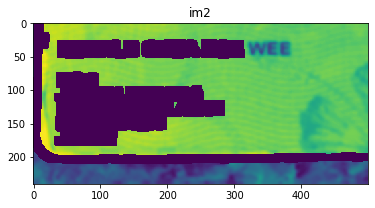

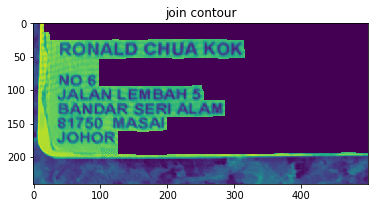

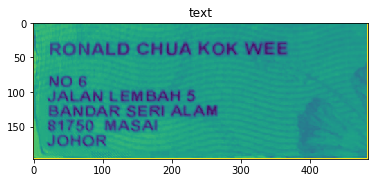

threshold value  108.0


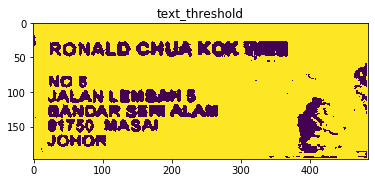

cropped:  | RONALD CHUA KOK INES
Nos q
JALAN LEMBAM & *
. BANOAR SEM ALAS v4
81760 MASA Mt
JOHOR so



In [69]:
img_file = os.path.join(TEST_IMAGE_PATH,'ocr/myhi00099.jpg')
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
image = hed_util.crop_image(net, image)
plt.title('original')
plt.imshow(image)
plt.show()  
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
img = cv2.resize(gray,(860,540),cv2.INTER_AREA)
#cropped = img
card = img[300:,0:500]
#cropped = cv2.medianBlur(cropped,3)
cropped = cv2.bilateralFilter(card, 9, 60,60)
# Performing OTSU threshold 
#cropped = cv2.GaussianBlur(cropped,(13,13),3)
thresh1 = cv2.adaptiveThreshold(cropped,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11, 9)


# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11)) 
  
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE) 
im2 = cropped.copy() 
im3 = card.copy()
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
    if(w>=100 and h>=20):  
        # Drawing a rectangle on copied image 
        cv2.drawContours(im2, [cnt], -1, (0,0,0), -1)
        #rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 

        # Cropping the text block for giving input to OCR 
        #cropped = im2[y:y + h, x:x + w] 
      
plt.title('im2')
plt.imshow(im2)
plt.show()    
kernel = np.ones((25,25),np.uint8)
opening = cv2.morphologyEx(im2, cv2.MORPH_OPEN, kernel)
#gray_op = cv2.cvtColor(opening, cv2.COLOR_BGR2GRAY)
contours_op, hierarchy_op = cv2.findContours(opening, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cnt = max(contours_op, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(cnt) 
rect = cv2.rectangle(card, (x, y), (x + w, y + h), (255, 0, 0), 2) 
cv2.drawContours(im3, [cnt], -1, (0, 0, 0), -1)
#cv2.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
plt.title('join contour')
plt.imshow(im3)
plt.show()  
text = card[y:y+h, x:x+w]
thresh1 = cv2.GaussianBlur(text,(3,3),0)
#text = cv2.bilateralFilter(text, 5, 50,50)
plt.title('text')
plt.imshow(text)
plt.show()
threshold_value = cv2.threshold(text, 0, 255, cv2.THRESH_OTSU)[0]
print('threshold value ', threshold_value)
text_threshold = cv2.threshold(text, threshold_value, 255, cv2.THRESH_BINARY)[1]
plt.title('text_threshold')
plt.imshow(text_threshold)
plt.show()
custom_config = r'--oem 3 --psm 6'
print('cropped: ' ,pytesseract.image_to_string(text_threshold,config = custom_config))

In [ ]:
img_file = os.path.join(TEST_IMAGE_PATH,'ocr/myhi00005.jpg')
img = cv2.imread(img_file, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray,(860,540),cv2.INTER_AREA)
#cropped = img
gray = gray[300:,0:500]

_, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# Create first mask used for rotation.
mask = np.ones(img.shape, np.uint8)*255

# Draw contours on the mask with size and ratio of borders for threshold.
for cnt in contours:
    size = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    if 10000 > size > 500 and w*2.5 > h:
        cv2.drawContours(mask, [cnt], -1, (0,0,0), -1)

# Connect neighbour contours and select the biggest one (text).
kernel = np.ones((50,50),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
gray_op = cv2.cvtColor(opening, cv2.COLOR_BGR2GRAY)
_, threshold_op = cv2.threshold(gray_op, 150, 255, cv2.THRESH_BINARY_INV)
contours_op, hierarchy_op = cv2.findContours(threshold_op, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = max(contours_op, key=cv2.contourArea)

# Create rotated rectangle to get the angle of rotation and the 4 points of the rectangle.
_, _, angle = rect = cv2.minAreaRect(cnt)
(h,w) = img.shape[:2]
(center) = (w//2,h//2)

# Rotate the image.
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (int(w),int(h)), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT)

# Create bounding box for rotated text (use old points of rotated rectangle).
box = cv2.boxPoints(rect)
a, b, c, d = box = np.int0(box)
bound =[]
bound.append(a)
bound.append(b)
bound.append(c)
bound.append(d)
bound = np.array(bound)
(x1, y1) = (bound[:,0].min(), bound[:,1].min())
(x2, y2) = (bound[:,0].max(), bound[:,1].max())
cv2.drawContours(img,[box],0,(0,0,255),2)

# Crop the image and create new mask for the final image.
rotated = rotated[y1:y2, x1:x2]
mask_final = np.ones(rotated.shape, np.uint8)*255

# Remove noise from the final image.
gray_r = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
_, threshold_r = cv2.threshold(gray_r, 150, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(threshold_r,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    size = cv2.contourArea(cnt)
    if size < 500:
        cv2.drawContours(threshold_r, [cnt], -1, (0,0,0), -1)

# Invert black and white.
final_image = cv2.bitwise_not(threshold_r)

# Display results.
plt.title('final')
plt.imshow(final_image)
plt.show()
plt.title('final')
plt.imshow(rotated)